In [36]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

fitted alpha value: 0.1848


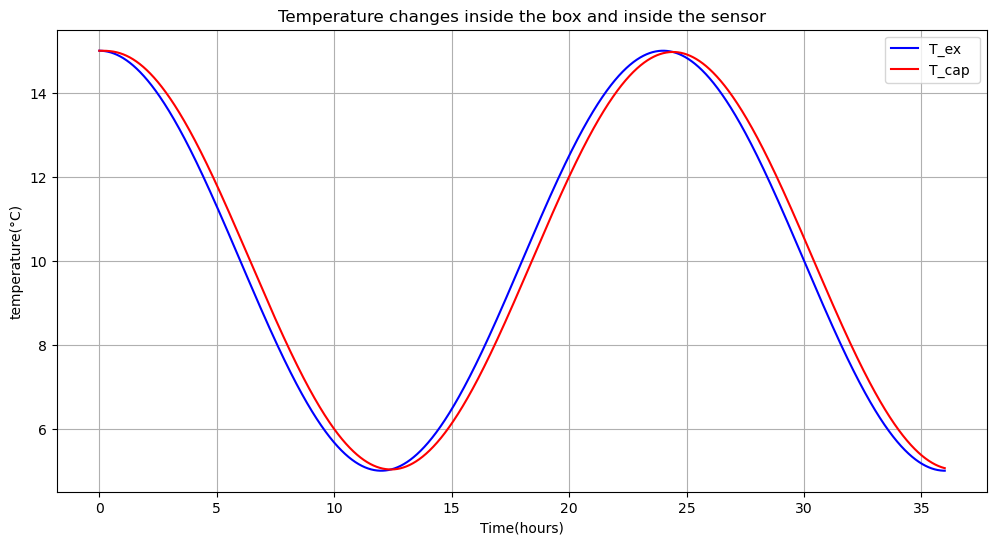

[14.970127851408243, 24.42]


In [37]:
delta_max_ex = 5 # ℃
average_T = 10
phi = 0  
alpha_initial = 0.1  
thickness = 0.004  
k_box = 50  # Thermal conductivity (W/m·K)
rho_box = 7850  
cp_box = 500  
alpha_diff = k_box / (rho_box * cp_box)  
total_time = 36  # hours
dt = 0.01 
num_steps = int(total_time / dt)
num_cells = 6  
dx = thickness / num_cells  

# check the stability
#if alpha_diff * dt / dx**2 > 0.5:
    #raise ValueError("Unstable：please change dt or dx")

T_ex = np.zeros(num_steps)  
T_in = np.zeros((num_steps, num_cells + 1))  
time = np.arange(num_steps) * dt

T_ex = delta_max_ex * np.cos(2 * np.pi * time / 24) +average_T
T_in[0, :] = T_ex[0]  
for n in range(0, num_steps - 1):
    for i in range(1, num_cells): 
        T_in[n + 1, i] = T_in[n, i] + (alpha_diff * dt / (dx**2)) * (T_in[n, i + 1] - 2 * T_in[n, i] + T_in[n, i - 1])

    T_in[n + 1, 0] = T_ex[n + 1]  # Boundary conditions
    T_in[n + 1, -1] = T_in[n + 1, -2]  
T_cap = T_in[:, num_cells // 2]  

def model_func(t, alpha_fit):
    return delta_max_ex * np.cos(2 * np.pi * t / 24 - alpha_fit * t + phi) * np.exp(-alpha_fit * t)

popt, pcov = curve_fit(model_func, time, T_cap, p0=[alpha_initial])
fitted_alpha = popt[0]

print(f"fitted alpha value: {fitted_alpha:.4f}")
plt.figure(figsize=(12, 6))
plt.plot(time, T_ex, label='T_ex ', color='blue')
plt.plot(time, T_cap, label='T_cap ', color='red')
plt.xlabel('Time(hours)')
plt.ylabel('temperature(°C)')
plt.title('Temperature changes inside the box and inside the sensor')
plt.legend()
plt.grid()
plt.show()

for i in range(1,num_steps-2):
    if T_cap[i-1] < T_cap[i]:
        if T_cap[i]>T_cap[i+1]:
            print([T_cap[i],time[i]])

In [38]:
delta_max_ex = 5 # ℃
average_T = 10
phi = 0  
alpha_initial = 0.1  

thickness_box = 0.005  
k_box = 205  #Thermal conductivity of Al
rho_box = 2700  
cp_box =  900 
alpha_diff_box = k_box / (rho_box * cp_box) 

thickness_air = 0.0375  
k_air = 0.025  # Thermal conductivity of air (W/m·K)
rho_air = 1.2  
cp_air =  1005 
alpha_diff_air = k_air / (rho_air * cp_air) 

thickness_Si = 0.015
k_Si= 0.3     # Thermal conductivity of silicone (W/m·K)
rho_Si= 1100
cp_Si = 1300
alpha_diff_Si =k_Si / (rho_Si * cp_Si)

total_time = 36  # hours
dt = 0.01 
num_steps = int(total_time / dt)
num_cells = 6 
dm = thickness_box / num_cells 
dx = thickness_air / num_cells
dl = thickness_Si /  num_cells

# check the stability
#if alpha_diff * dt / dx**2 > 0.5:
    #raise ValueError("Unstable：please change dt or dx")

T_box = np.zeros((num_steps, num_cells + 1)) 
T_air =  np.zeros((num_steps, num_cells + 1)) 
T_cap = np.zeros((num_steps, num_cells +1))
time = np.arange(num_steps) * dt

T_ex = delta_max_ex * np.sin(2 * np.pi * time / 24) +average_T
T_box[0, :] = T_ex[0]    # Boundary conditions
T_air[0, :] = T_box[0, -1]
T_cap[0, :] = T_air[0, -1]
for n in range(0, num_steps - 1):
    for i in range(1, num_cells): 
        T_box[n + 1, i] = T_box[n, i] + (alpha_diff_box * dt / (dm**2)) * (T_box[n, i + 1] - 2 * T_box[n, i] + T_box[n, i - 1])   
    T_box[n + 1, 0] = T_ex[n + 1] 
    T_box[n + 1, -1] = T_box[n + 1, -2]
    for k in range(0, num_cells):
        T_air[n + 1, k] = T_air[n, k] + (alpha_diff_air * dt / (dx**2)) * (T_air[n, k + 1] - 2 * T_air[n, k] + T_air[n, k-1])
    T_air[n + 1, 0] = T_box[n + 1, -1] 
    T_air[n + 1, -1] = T_air[n + 1, -2]  
    for j in range(0, num_cells):
        T_cap[n + 1, j] = T_cap[n, j] + (alpha_diff_Si * dt / (dl**2)) * (T_cap[n, j + 1] - 2 * T_cap[n, j] + T_cap[n, j - 1]) 
    T_cap[n + 1, 0] = T_air[n + 1, -1]     
    T_cap[n + 1, -1] = T_cap[n + 1, -2]

def model_func(t, alpha_fit):
    return delta_max_ex * np.sin(2 * np.pi * t / 24 - alpha_fit * t + phi) * np.exp(-alpha_fit * t)

popt, pcov = curve_fit(model_func, time, T_cap[:, num_cells // 2], p0=[alpha_initial])
fitted_alpha = popt[0]

print(f"fitted alpha value: {fitted_alpha:.4f}")
plt.figure(figsize=(12, 6))
plt.plot(time, T_ex, label='T_ex ', color='blue')
plt.plot(time, T_air[:, num_cells // 2], label='T_air ', color='green')
plt.plot(time, T_cap[:, num_cells // 2], label='T_cap ', color='red')
plt.xlabel('Time(hours)')
plt.ylabel('temperature(°C)')
plt.title('Temperature changes inside the box and inside the sensor')
plt.legend()
plt.grid()
plt.show()

for i in range(1,num_steps-2):
    if T_cap[i-1,num_cells // 2] < T_cap[i,num_cells // 2]:
        if T_cap[i,num_cells // 2]>T_cap[i+1,num_cells // 2]:
            print([T_cap[i,num_cells // 2],time[i]])

C:\Users\Reiji Kotobuki\AppData\Local\Temp\ipykernel_25884\2471656502.py:47: RuntimeWarning: overflow encountered in double_scalars
  T_box[n + 1, i] = T_box[n, i] + (alpha_diff_box * dt / (dm**2)) * (T_box[n, i + 1] - 2 * T_box[n, i] + T_box[n, i - 1])
C:\Users\Reiji Kotobuki\AppData\Local\Temp\ipykernel_25884\2471656502.py:47: RuntimeWarning: invalid value encountered in double_scalars
  T_box[n + 1, i] = T_box[n, i] + (alpha_diff_box * dt / (dm**2)) * (T_box[n, i + 1] - 2 * T_box[n, i] + T_box[n, i - 1])
C:\Users\Reiji Kotobuki\AppData\Local\Temp\ipykernel_25884\2471656502.py:51: RuntimeWarning: invalid value encountered in double_scalars
  T_air[n + 1, k] = T_air[n, k] + (alpha_diff_air * dt / (dx**2)) * (T_air[n, k + 1] - 2 * T_air[n, k] + T_air[n, k-1])
C:\Users\Reiji Kotobuki\AppData\Local\Temp\ipykernel_25884\2471656502.py:55: RuntimeWarning: invalid value encountered in double_scalars
  T_cap[n + 1, j] = T_cap[n, j] + (alpha_diff_Si * dt / (dl**2)) * (T_cap[n, j + 1] - 2 * T_c

ValueError: array must not contain infs or NaNs

fitted alpha value: 0.1849


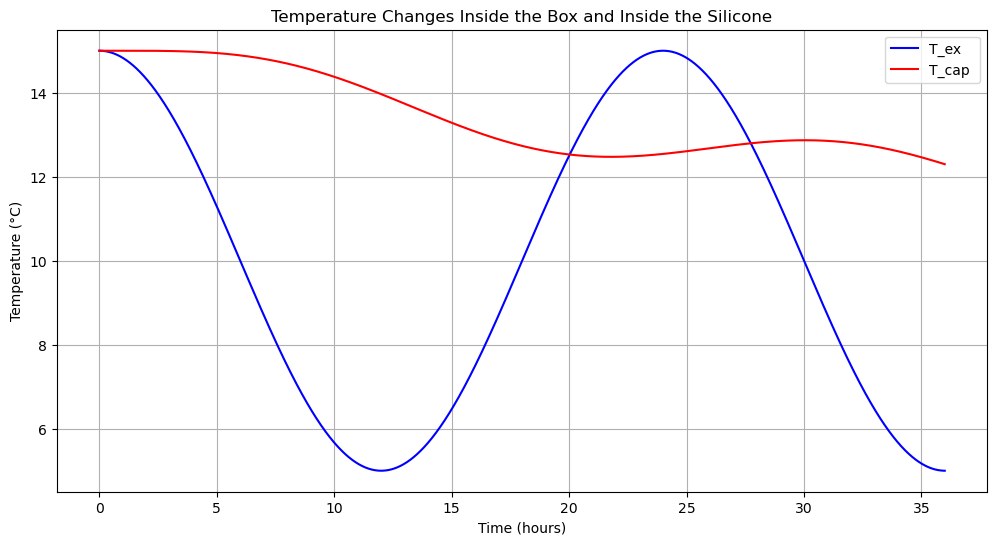

[12.868597141459164, 30.04]


In [ ]:
# param mtn
delta_max_ex = 5  # ℃
average_T = 10
phi = 0  
alpha_initial = 0.1  
thickness = 0.004  
k_box = 50  # Thermal conductivity of the box (W/m·K)
rho_box = 7850  
cp_box = 500  
alpha_diff_box = k_box / (rho_box * cp_box)  

# param ajouté : Silicon
k_silicone = 0.2  # Thermal conductivity of silicone (W/m·K)
rho_silicone = 1100  # Density of silicone (kg/m³)
cp_silicone = 1500  # Specific heat capacity of silicone (J/kg·K)
alpha_diff_silicone = k_silicone / (rho_silicone * cp_silicone)

# param du temp
total_time = 36  # hours
dt = 0.01 
num_steps = int(total_time / dt)
num_cells_box = 6  # Box cells
num_cells_silicone = 4  # Silicone cells
dx_box = thickness / num_cells_box  
dx_silicone = thickness / num_cells_silicone  

# temperature
T_ex = np.zeros(num_steps)  
T_in_box = np.zeros((num_steps, num_cells_box + 1))  
T_in_silicone = np.zeros((num_steps, num_cells_silicone + 1))  
time = np.arange(num_steps) * dt

# temperature ext
T_ex = delta_max_ex * np.cos(2 * np.pi * time / 24) + average_T
T_in_box[0, :] = T_ex[0]  
T_in_silicone[0, :] = T_in_box[0, -1]  # temperature initiale

# processus de propagation
for n in range(0, num_steps - 1):
    for i in range(1, num_cells_box): 
        T_in_box[n + 1, i] = T_in_box[n, i] + (alpha_diff_box * dt / (dx_box**2)) * (T_in_box[n, i + 1] - 2 * T_in_box[n, i] + T_in_box[n, i - 1])
    
    T_in_box[n + 1, 0] = T_ex[n + 1]  # condition limite
    T_in_box[n + 1, -1] = T_in_box[n + 1, -2]  # condition limite

    for i in range(1, num_cells_silicone): 
        T_in_silicone[n + 1, i] = T_in_silicone[n, i] + (alpha_diff_silicone * dt / (dx_silicone**2)) * (T_in_silicone[n, i + 1] - 2 * T_in_silicone[n, i] + T_in_silicone[n, i - 1])
    
    T_in_silicone[n + 1, 0] = T_in_box[n + 1, -1]  
    T_in_silicone[n + 1, -1] = T_in_silicone[n + 1, -2] 
# temperature au milieu
T_cap = T_in_silicone[:, num_cells_silicone // 2]

def model_func(t, alpha_fit):
    return delta_max_ex * np.cos(2 * np.pi * t / 24 - alpha_fit * t + phi) * np.exp(-alpha_fit * t)

popt, pcov = curve_fit(model_func, time, T_cap, p0=[alpha_initial])
fitted_alpha = popt[0]

print(f"fitted alpha value: {fitted_alpha:.4f}")

# visualisation
plt.figure(figsize=(12, 6))
plt.plot(time, T_ex, label='T_ex ', color='blue')
plt.plot(time, T_cap, label='T_cap ', color='red')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Changes Inside the Box and Inside the Silicone')
plt.legend()
plt.grid()
plt.show()

for i in range(1, num_steps - 2):
    if T_cap[i - 1] < T_cap[i] and T_cap[i] > T_cap[i + 1]:
        print([T_cap[i], time[i]])

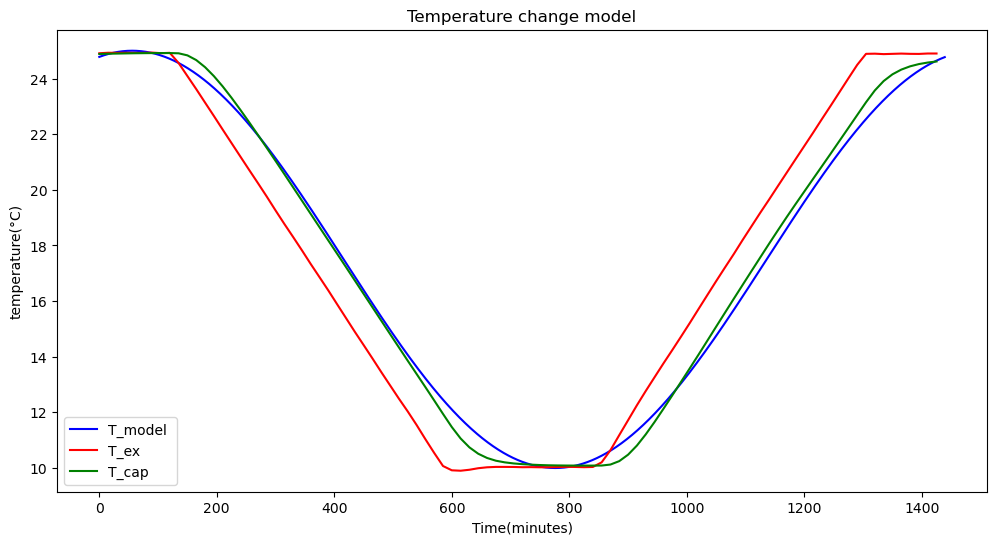

In [ ]:
total_time = 24*60                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
dt = 1 
num_steps = int(total_time / dt)
time = np.arange(num_steps) * dt
deltaT_max=15
def model(time,deltaT_max):
    return  1/2*deltaT_max*np.cos((time+0.342*deltaT_max-61.05)*np.pi/(12*60))+ 17.5 #*np.exp(0.342*deltaT_max-61.05)

T_model=np.zeros(num_steps) 
for i in range(0, num_steps):
    T_model[i]= model(time[i],deltaT_max)

data1 = [ 24.90888889, 24.92722222, 24.92222222, 24.925, 24.92222222, 24.92111111, 24.93277778, 24.91222222, 24.92388889, 24.55777778, 24.08777778, 23.62, 23.13611111, 22.655, 22.16611111, 21.68222222, 21.19888889, 20.71722222, 20.24111111, 19.75777778, 19.25888889, 18.77222222, 18.30111111, 17.82111111, 17.32888889, 16.85388889, 16.37611111, 15.88, 15.38722222, 14.89388889, 14.41722222, 13.93611111, 13.44611111, 12.96888889, 12.49111111, 12.03277778, 11.54888889, 11.03722222, 10.54222222, 10.07222222, 9.917777778, 9.902777778, 9.937777778, 9.992777778, 10.02611111, 10.04, 10.04, 10.03777778, 10.02888889, 10.03222222, 10.02611111, 10.03, 10.035, 10.04277778, 10.03777778, 10.03, 10.03777778, 10.20388889, 10.64111111, 11.18277778, 11.71777778, 12.255, 12.76611111, 13.26111111, 13.75388889, 14.23222222, 14.71888889, 15.21222222, 15.71777778, 16.22, 16.72, 17.21, 17.69388889, 18.19777778, 18.68722222, 19.17611111, 19.65, 20.135, 20.61611111, 21.09722222, 21.57611111, 22.055, 22.54611111, 23.02777778, 23.51777778, 24.00777778, 24.49222222, 24.88777778, 24.89388889, 24.87777778, 24.88777778, 24.89722222, 24.88777778, 24.885, 24.9, 24.9]
data2 = [24.88277778, 24.89222222, 24.89777778, 24.90388889, 24.90888889, 24.91222222, 24.915, 24.91611111,
    24.91611111, 24.90722222, 24.83277778, 24.66388889, 24.40888889, 24.08777778, 23.71722222, 23.31,
    22.87777778, 22.43111111, 21.97277778, 21.50888889, 21.03888889, 20.56388889, 20.08611111, 19.60722222,
    19.12888889, 18.65, 18.17277778, 17.69611111, 17.21888889, 16.73777778, 16.25611111, 15.775, 15.29388889,
    14.81277778, 14.33388889, 13.85611111, 13.38277778, 12.90888889, 12.42888889, 11.945, 11.47222222,
    11.06111111, 10.74111111, 10.51277778, 10.36111111, 10.26277778, 10.20388889, 10.165, 10.13888889,
    10.12111111, 10.10722222, 10.09777778, 10.09222222, 10.08888889, 10.08722222, 10.08722222, 10.08722222,
    10.08888889, 10.125, 10.24777778, 10.47888889, 10.80611111, 11.20722222, 11.65222222, 12.12222222,
    12.60388889, 13.09277778, 13.58277778, 14.07777778, 14.58, 15.08388889, 15.585, 16.08611111, 16.58277778,
    17.07888889, 17.57111111, 18.06222222, 18.545, 19.02, 19.48388889, 19.94, 20.39611111, 20.85,
    21.30611111, 21.76611111, 22.22611111, 22.68777778, 23.14777778, 23.57277778, 23.91, 24.15222222,
    24.32111111, 24.43888889, 24.52, 24.575, 24.61388889]
timereal = np.zeros(int(num_steps/15))
i=0
for n in range(0,num_steps,15):
    timereal[i]=n
    i=i+1
    

plt.figure(figsize=(12, 6))
plt.plot(time, T_model, label='T_model ', color='blue')
plt.plot(timereal, data1, label='T_ex ', color='red')
plt.plot(timereal, data2, label='T_cap ', color='green')
plt.xlabel('Time(minutes)')
plt.ylabel('temperature(°C)')
plt.title('Temperature change model')
plt.legend()
plt.show()